In [1]:
import numpy as np 
import tensorflow as tf
import keras
from keras import utils,callbacks
from keras.models import Sequential,Model
from keras.applications.vgg16 import VGG16
from keras.layers.core import Dropout,Flatten,Dense
from keras.layers.convolutional import Convolution2D,MaxPooling2D,ZeroPadding2D
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split, StratifiedKFold
from skimage.transform import resize
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions
import PIL.Image
from tensorflow import lite 
import matplotlib.pyplot as plt 
import datetime

In [2]:
train_dir=r"D:\jupyternotebooks\prototype 1\
n"
test_dir=r"D:\jupyternotebooks\prototype 1\asl_alphabet_test\asl_alphabet_test"

In [3]:
classes=29
batch=256
epochs=10
lnr=0.0001

In [4]:
img_gen=ImageDataGenerator(rescale=1./255,validation_split=0.1)
train=img_gen.flow_from_directory(train_dir,target_size=(64,64),subset="training")
eval=img_gen.flow_from_directory(train_dir,target_size=(64,64),subset="validation")

Found 78300 images belonging to 29 classes.
Found 8694 images belonging to 29 classes.


In [5]:
adam=Adam(learning_rate=lnr)
model=Sequential()
model.add(VGG16(weights='imagenet',include_top=False,input_shape=(64,64,3)))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(29,activation='softmax'))
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 2, 2, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               524544    
_________________________________________________________________
dense_1 (Dense)              (None, 29)                7453      
Total params: 15,246,685
Trainable params: 15,246,685
Non-trainable params: 0
_________________________________________________________________


In [7]:
print(datetime.datetime.now().time())

14:49:33.504554


In [8]:
earlystopping=callbacks.EarlyStopping(monitor="val_loss",
                                      mode='min',
                                      patience=5,
                                      restore_best_weights=True)

history=model.fit(train,
                  validation_data=eval,
                  epochs=10,
                  shuffle=True,
                  verbose=1,
                  callbacks=[earlystopping])


Epoch 1/10
2447/2447 [==============================] - 1573s 640ms/step - loss: 0.3853 - accuracy: 0.8877 - val_loss: 0.1214 - val_accuracy: 0.9649
Epoch 2/10
2447/2447 [==============================] - 416s 170ms/step - loss: 0.0269 - accuracy: 0.9922 - val_loss: 0.0838 - val_accuracy: 0.9781
Epoch 3/10
2447/2447 [==============================] - 849s 347ms/step - loss: 0.0185 - accuracy: 0.9956 - val_loss: 0.0792 - val_accuracy: 0.9772
Epoch 4/10
2447/2447 [==============================] - 403s 165ms/step - loss: 0.0234 - accuracy: 0.9949 - val_loss: 0.1569 - val_accuracy: 0.9562
Epoch 5/10
2447/2447 [==============================] - 375s 153ms/step - loss: 0.0114 - accuracy: 0.9976 - val_loss: 0.1975 - val_accuracy: 0.9633
Epoch 6/10
2447/2447 [==============================] - 366s 150ms/step - loss: 0.0147 - accuracy: 0.9966 - val_loss: 0.0641 - val_accuracy: 0.9823
Epoch 7/10
2447/2447 [==============================] - 364s 149ms/step - loss: 0.0082 - accuracy: 0.9984 - val

In [9]:
model_file="VGG16(10ep).h5"
keras.models.save_model(model,model_file)

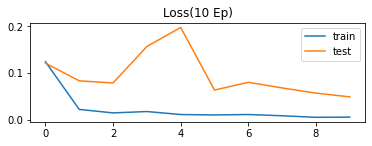

In [10]:
plt.subplot(211)
plt.title('Loss(10 Ep)')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.savefig('Loss(10 Ep).png')
plt.show()

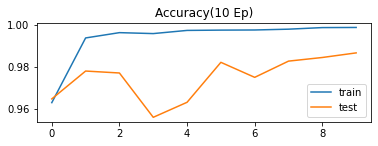

In [15]:
plt.subplot(212)
plt.title('Accuracy(10 Ep)')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.savefig('Accuracy(10 Ep).png')
plt.show()

In [12]:
print(datetime.datetime.now().time())

16:20:13.926333


In [ ]:
# test=ImageDataGenerator(rescale=1./255).flow_from_directory(test_dir,target_size=(64,64),class_mode=None)
# pred=model.predict(test)
# pred = np.argmax(pred, axis=1)
# pred

In [ ]:
# model = keras.models.load_model('D:\jupyternotebooks\prototype 1')
# dir=r"D:\jupyternotebooks\test"
# test=ImageDataGenerator(rescale=1./255).flow_from_directory(dir,target_size=(64,64),class_mode=None)
# pred=model.predict(test)
# pred = np.argmax(pred, axis=1)
# pred[0]

In [44]:
adam=Adam(learning_rate=lnr)
model=Sequential()
model.add(VGG16(weights='imagenet',include_top=False,input_shape=(64,64,3)))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(29,activation='softmax'))
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 2, 2, 512)         14714688  
_________________________________________________________________
flatten_7 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               524544    
_________________________________________________________________
dense_15 (Dense)             (None, 29)                7453      
Total params: 15,246,685
Trainable params: 15,246,685
Non-trainable params: 0
_________________________________________________________________


In [46]:
print(datetime.datetime.now().time())

20:26:31.918852


In [47]:
earlystopping=callbacks.EarlyStopping(monitor="val_loss",
                                      mode='min',
                                      patience=5,
                                      restore_best_weights=True)

history=model.fit(train,
                  validation_data=eval,
                  epochs=25,
                  shuffle=True,
                  verbose=1,
                  callbacks=[earlystopping])

Epoch 1/25
2447/2447 [==============================] - 1717s 701ms/step - loss: 0.3926 - accuracy: 0.8838 - val_loss: 0.2005 - val_accuracy: 0.9406
Epoch 2/25
2447/2447 [==============================] - 1290s 527ms/step - loss: 0.0191 - accuracy: 0.9947 - val_loss: 0.1860 - val_accuracy: 0.9603
Epoch 3/25
2447/2447 [==============================] - 453s 185ms/step - loss: 0.0138 - accuracy: 0.9970 - val_loss: 0.1102 - val_accuracy: 0.9737
Epoch 4/25
2447/2447 [==============================] - 647s 264ms/step - loss: 0.0121 - accuracy: 0.9971 - val_loss: 0.0713 - val_accuracy: 0.9849
Epoch 5/25
2447/2447 [==============================] - 575s 235ms/step - loss: 6.7038e-05 - accuracy: 1.0000 - val_loss: 0.0409 - val_accuracy: 0.9877
Epoch 6/25
2447/2447 [==============================] - 522s 213ms/step - loss: 1.9348e-06 - accuracy: 1.0000 - val_loss: 0.0413 - val_accuracy: 0.9883
Epoch 7/25
2447/2447 [==============================] - 419s 171ms/step - loss: 2.4693e-07 - accuracy:

In [48]:
model_file="VGG16(25ep).h5"
keras.models.save_model(model,model_file)

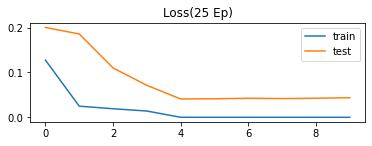

In [49]:
plt.subplot(211)
plt.title('Loss(25 Ep)')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.savefig('Loss(25 Ep).png')
plt.show()

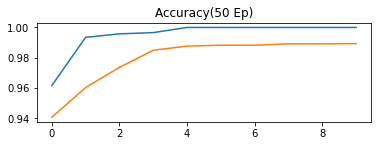

In [50]:
plt.subplot(212)
plt.title('Accuracy(50 Ep)')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.savefig('Accuracy(50 Ep).png')
plt.show()

In [51]:
print(datetime.datetime.now().time())

22:19:14.989116


In [32]:
adam=Adam(learning_rate=lnr)
model=Sequential()
model.add(VGG16(weights='imagenet',include_top=False,input_shape=(64,64,3)))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(29,activation='softmax'))
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 2, 2, 512)         14714688  
_________________________________________________________________
flatten_5 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               524544    
_________________________________________________________________
dense_11 (Dense)             (None, 29)                7453      
Total params: 15,246,685
Trainable params: 15,246,685
Non-trainable params: 0
_________________________________________________________________


In [34]:
print(datetime.datetime.now().time())

17:40:49.159177


In [35]:
earlystopping=callbacks.EarlyStopping(monitor="val_loss",
                                      mode='min',
                                      patience=5,
                                      restore_best_weights=True)

history=model.fit(train,
                  validation_data=eval,
                  epochs=50,
                  shuffle=True,
                  verbose=1,
                  callbacks=[earlystopping])

Epoch 1/50
2447/2447 [==============================] - 484s 197ms/step - loss: 0.3875 - accuracy: 0.8854 - val_loss: 0.1953 - val_accuracy: 0.9530
Epoch 2/50
2447/2447 [==============================] - 518s 212ms/step - loss: 0.0265 - accuracy: 0.9932 - val_loss: 0.0649 - val_accuracy: 0.9836
Epoch 3/50
2447/2447 [==============================] - 1132s 463ms/step - loss: 0.0147 - accuracy: 0.9964 - val_loss: 0.0285 - val_accuracy: 0.9915
Epoch 4/50
2447/2447 [==============================] - 1085s 442ms/step - loss: 0.0107 - accuracy: 0.9977 - val_loss: 0.0465 - val_accuracy: 0.9870
Epoch 5/50
2447/2447 [==============================] - 1073s 439ms/step - loss: 0.0136 - accuracy: 0.9970 - val_loss: 0.0276 - val_accuracy: 0.9919
Epoch 6/50
2447/2447 [==============================] - 404s 165ms/step - loss: 1.8766e-05 - accuracy: 1.0000 - val_loss: 0.0221 - val_accuracy: 0.9941
Epoch 7/50
2447/2447 [==============================] - 352s 144ms/step - loss: 1.1943e-06 - accuracy: 1.

In [36]:
model_file="VGG16(50ep).h5"
keras.models.save_model(model,model_file)

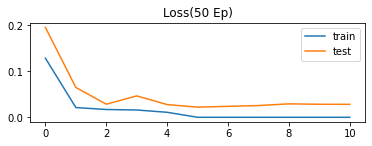

In [37]:
plt.subplot(211)
plt.title('Loss(50 Ep)')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.savefig('Loss(50 Ep).png')
plt.show()

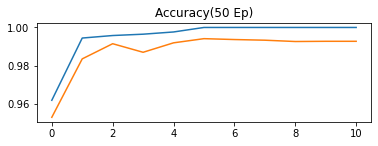

In [38]:
plt.subplot(212)
plt.title('Accuracy(50 Ep)')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.savefig('Accuracy(50 Ep).png')
plt.show()

In [39]:
print(datetime.datetime.now().time())

19:39:53.937273


###### #convert the model 
# converter=tf.lite.TFLiteConverter.from_saved_model('D:\jupyternotebooks\prototype 1')
# tflite_model = converter.convert()

In [ ]:
# # Save the model.
# with open('model.tflite', 'wb') as f:
#   f.write(tflite_model)

In [ ]:
earlystopping=callbacks.EarlyStopping(monitor="val_loss",
                                      mode='min',
                                      patience=5,
                                      restore_best_weights=True)

history=model.fit(train,
                  validation_data=eval,
                  epochs=2,
                  shuffle=True,
                  verbose=1,
                  callbacks=[earlystopping])

In [ ]:
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [ ]:
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()